### Referencia: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/

In [2]:
install.packages(c("FactoMineR","factoextra"))


The downloaded binary packages are in
	/var/folders/05/nyrh4fgd37j0cwv9czt39c700000gn/T//RtmpAKlniI/downloaded_packages


In [3]:
library("FactoMineR")
library("factoextra")

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [4]:
data(poison)

In [5]:
head(poison,3)

Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [6]:
dim(poison)

[1] 55 15

## I decide what are my columns for active variables (I remove the diagnosis, age and time)

In [7]:
poison.active <- poison[1:55,5:15]
head(poison.active,3)

Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato,Fish,Mayo,Courgette,Cheese,Icecream
Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y
Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_n,Icecream_y
Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y,Fish_y,Mayo_y,Courg_y,Cheese_y,Icecream_y


In [8]:
summary(poison.active)

      Nausea      Vomiting   Abdominals     Fever          Diarrhae 
 Nausea_n:43   Vomit_n:33   Abdo_n:18   Fever_n:20   Diarrhea_n:20  
 Nausea_y:12   Vomit_y:22   Abdo_y:37   Fever_y:35   Diarrhea_y:35  
      Potato       Fish        Mayo      Courgette       Cheese  
 Potato_n: 3   Fish_n: 1   Mayo_n:10   Courg_n: 5   Cheese_n: 7  
 Potato_y:52   Fish_y:54   Mayo_y:45   Courg_y:50   Cheese_y:48  
       Icecream 
 Icecream_n: 4  
 Icecream_y:51  

## MCA

In [9]:
res.mca <- MCA(poison.active, graph = TRUE)

In [10]:
print(res.mca)

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 55 individuals, described by 11 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 


No idea why I cannot see the graph

In [11]:
eig.val <- get_eigenvalue(res.mca)

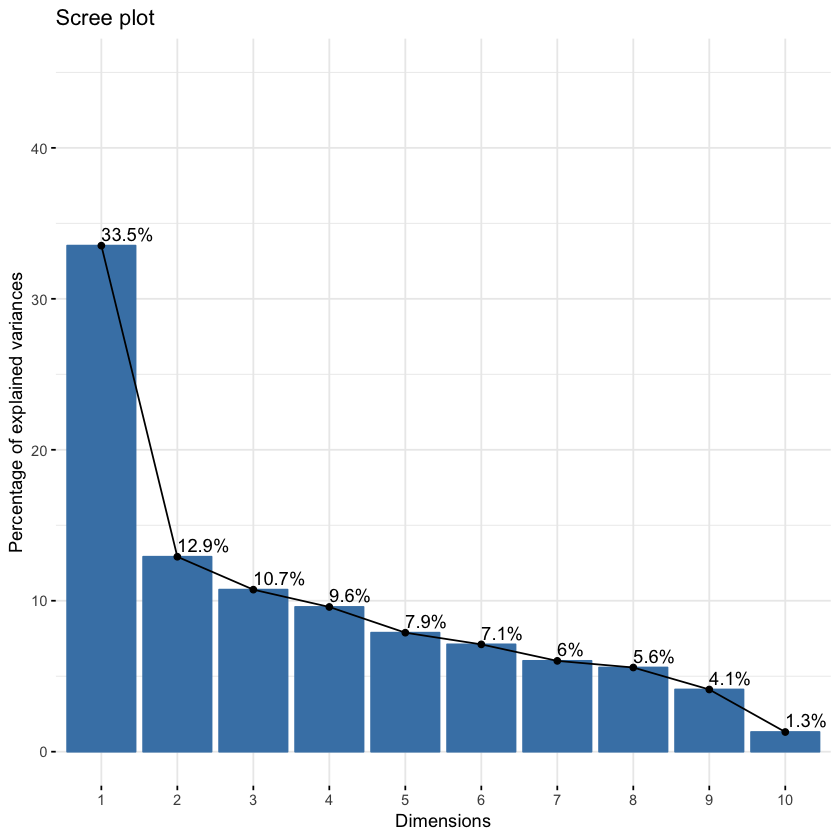

In [12]:
fviz_screeplot(res.mca, addlabels = TRUE, ylim = c(0, 45))

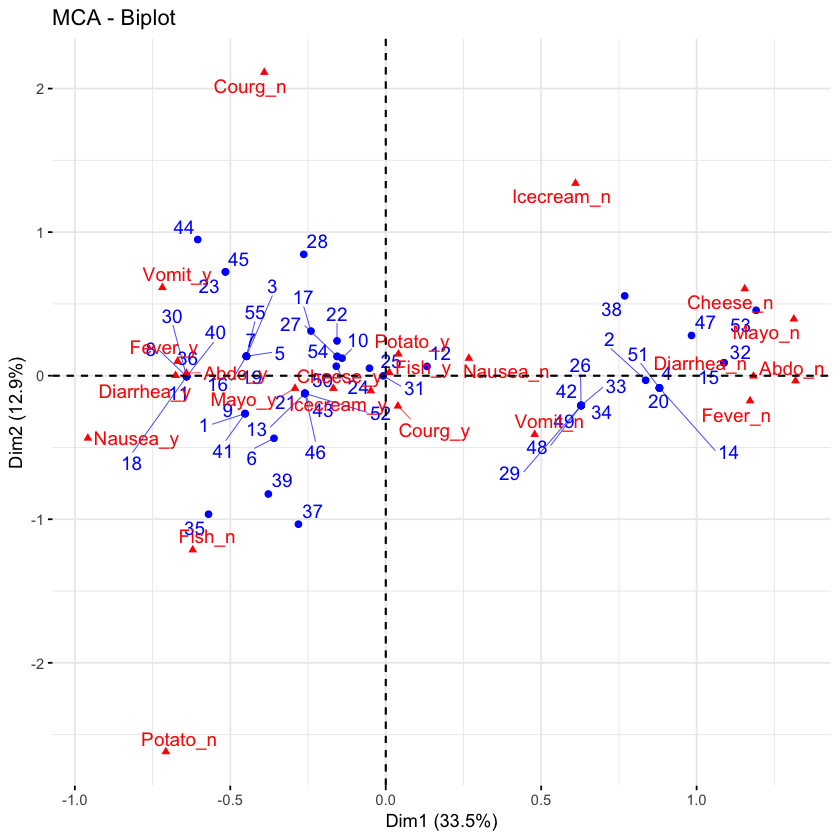

In [13]:
fviz_mca_biplot(res.mca, 
               repel = TRUE, # Avoid text overlapping (slow if many point)
               ggtheme = theme_minimal())

In [14]:
var <- get_mca_var(res.mca)
var

Multiple Correspondence Analysis Results for variables
  Name       Description                  
1 "$coord"   "Coordinates for categories" 
2 "$cos2"    "Cos2 for categories"        
3 "$contrib" "contributions of categories"

### The questions in terms of principal components

In [15]:
head(var$coord,20)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,0.26739087,0.121390290,-0.265583253,0.03376130,0.073704999
Nausea_y,-0.95815062,-0.434981874,0.951673323,-0.12097801,-0.264109581
Vomit_n,0.47902794,-0.409194649,0.084492799,0.27361142,0.052452504
Vomit_y,-0.71854191,0.613791974,-0.126739198,-0.41041713,-0.078678757
Abdo_n,1.31802207,-0.035745005,-0.005094243,-0.15360951,-0.069869870
Abdo_y,-0.64119993,0.017389462,0.002478280,0.07472895,0.033990747
Fever_n,1.17183098,-0.174895110,0.097275290,-0.18967098,-0.018478570
Fever_y,-0.66961770,0.099940063,-0.055585880,0.10838342,0.010559183
Diarrhea_n,1.18282245,-0.002756840,-0.082979839,-0.24123007,-0.104910816
Diarrhea_y,-0.67589854,0.001575337,0.047417051,0.13784575,0.059949038


## Contribution to the principal components

In [16]:
head(var$contrib)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,1.515869,0.81100008,4.670018e+00,0.08449397,0.48977906
Nausea_y,5.431862,2.90608363,1.673423e+01,0.30277007,1.75504164
Vomit_n,3.733667,7.07226253,3.627455e-01,4.25893721,0.19036376
Vomit_y,5.600500,10.60839380,5.441183e-01,6.38840581,0.28554563
Abdo_n,15.417637,0.02943661,7.192511e-04,0.73219636,0.18424268
Abdo_y,7.500472,0.01432051,3.499060e-04,0.35620363,0.08963157


## Correlation between variables and PC

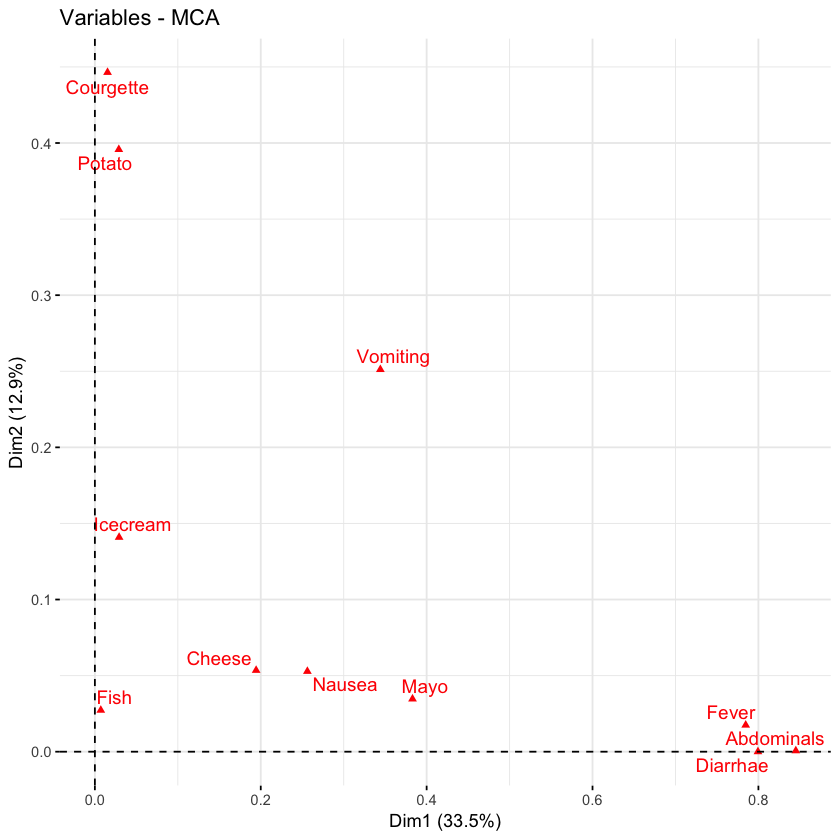

In [17]:
fviz_mca_var(res.mca, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

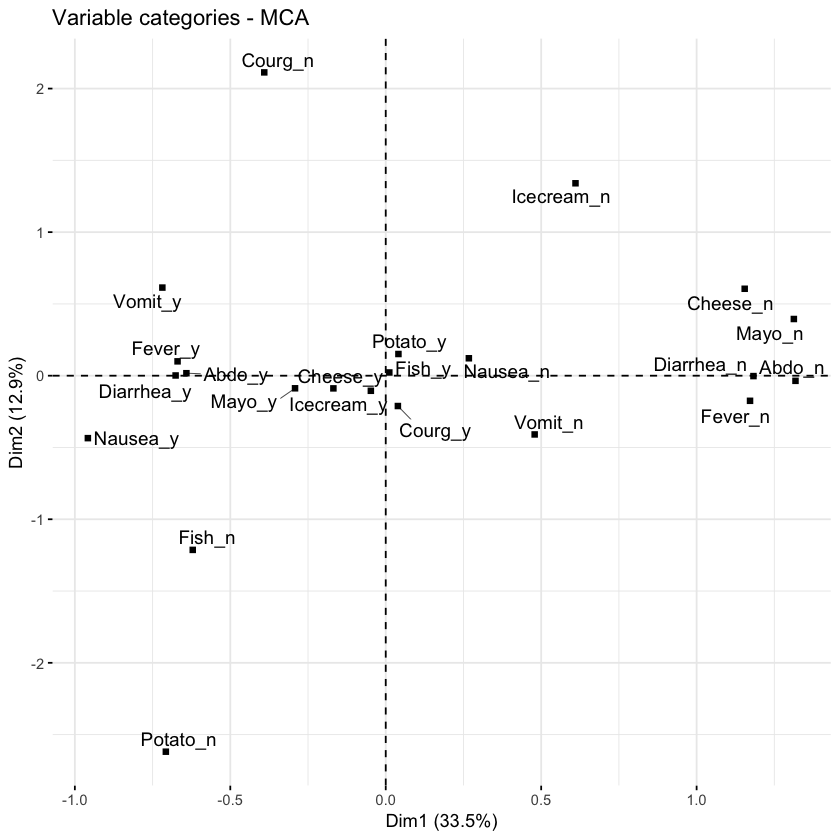

In [18]:
fviz_mca_var(res.mca, col.var="black", shape.var = 15,
             repel = TRUE)

The quality of the representation is called *the squared cosine (cos2)*, which measures the degree of association between variable categories and a particular axis. 

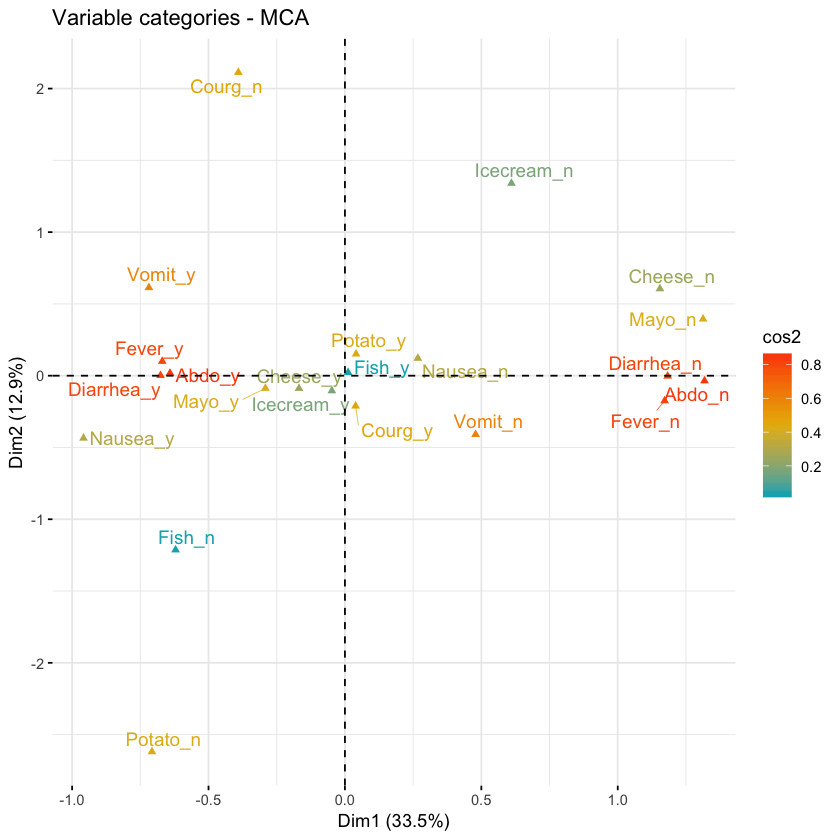

In [19]:
# Color by cos2 values: quality on the factor map
fviz_mca_var(res.mca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # Avoid text overlapping
             ggtheme = theme_minimal())


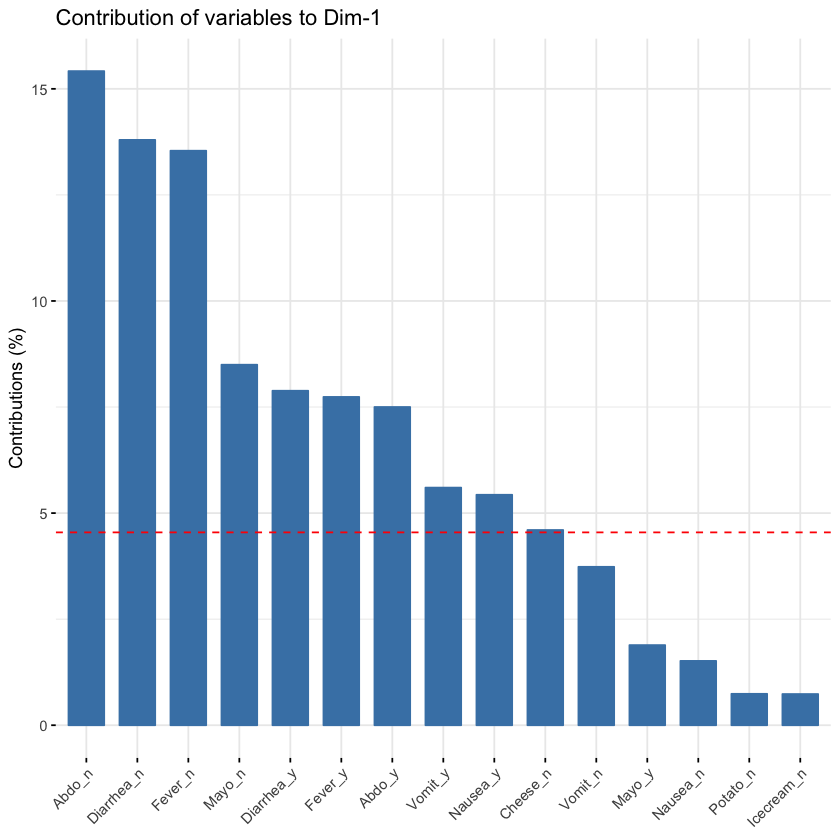

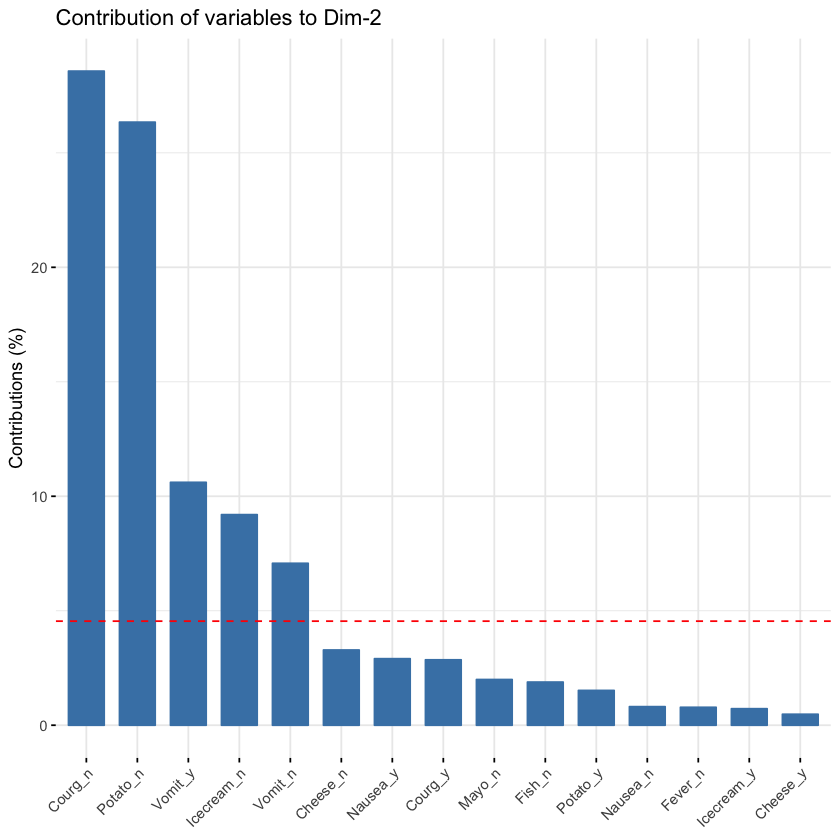

In [20]:
fviz_contrib(res.mca, choice = "var", axes = 1, top = 15)
fviz_contrib(res.mca, choice = "var", axes = 2, top = 15)

# Dashed lines are the expected average value for uniform contribution

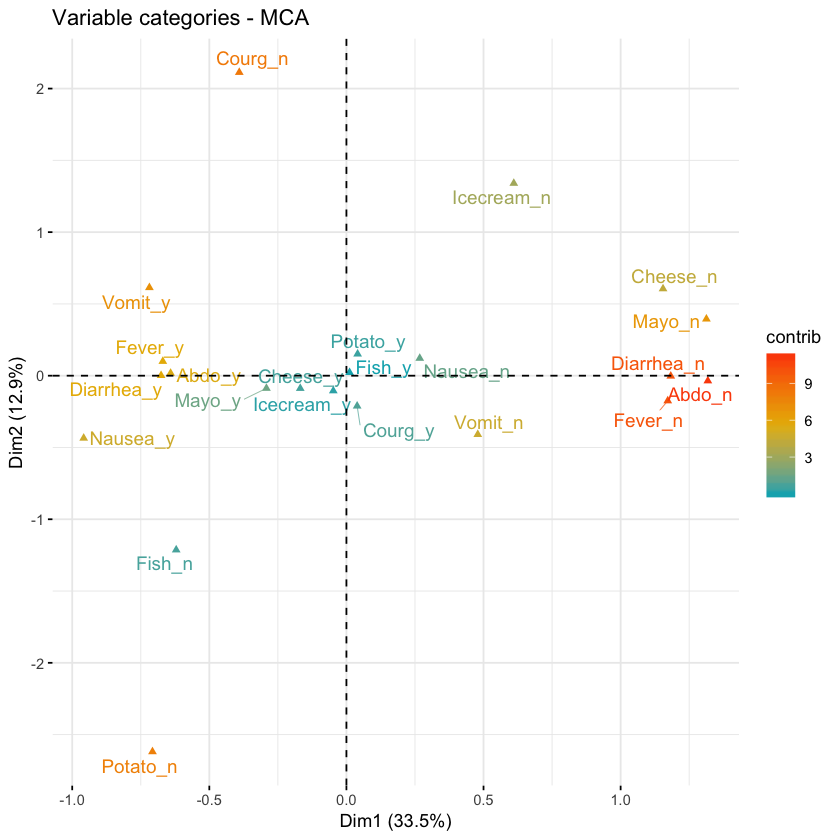

In [21]:
fviz_mca_var(res.mca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # avoid text overlapping (slow)
             ggtheme = theme_minimal()
             )

## Visualization of individuals

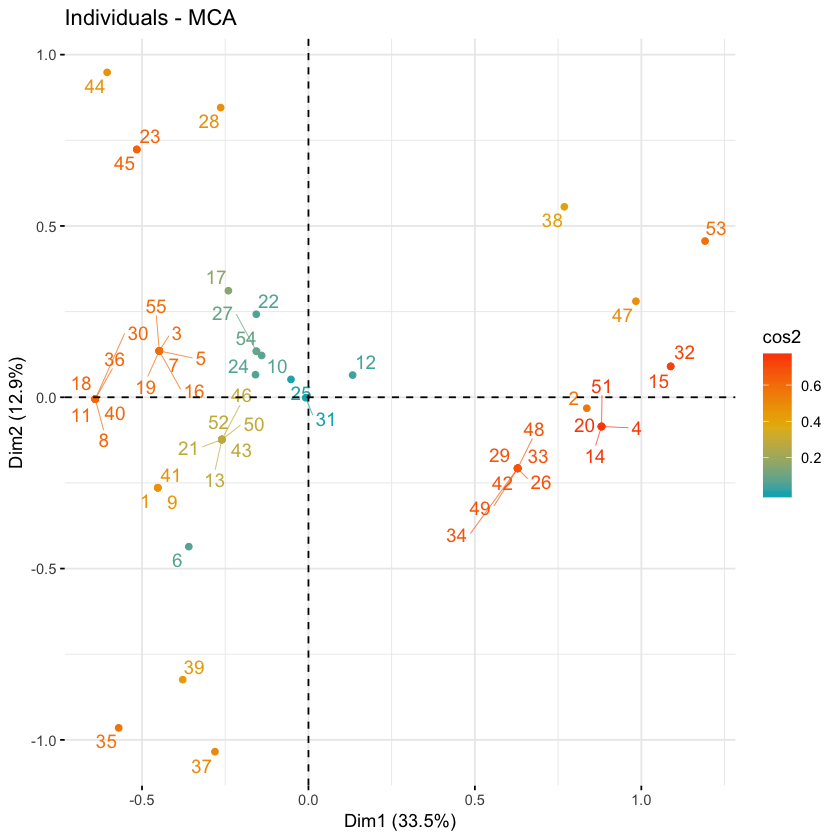

In [22]:
fviz_mca_ind(res.mca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping (slow if many points)
             ggtheme = theme_minimal())

## Suplemental variables

In [23]:
res.mca <- MCA(poison,  quanti.sup = 1:2, quali.sup = 3:4,  graph=FALSE)

In [47]:
# Supplementary qualitative variable categories
res.mca$quali.sup
# Supplementary quantitative variables
res.mca$quanti
# Supplementary individuals
res.mca$ind.sup

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Sick_n,1.40983382,-0.05780887,0.03535043,-0.12299072,-0.05644922
Sick_y,-0.63071513,0.02586186,-0.01581467,0.05502217,0.02525360
F,0.02736360,0.11839736,0.08920658,-0.03662471,-0.03965681
M,-0.02837707,-0.12278244,-0.09251053,0.03798119,0.04112558
,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Sick_n,0.8892035226,0.001495045,0.0005590553,0.006767216,0.001425546
Sick_y,0.8892035226,0.001495045,0.0005590553,0.006767216,0.001425546
F,0.0007764989,0.014537117,0.0082525484,0.001391050,0.001630909
M,0.0007764989,0.014537117,0.0082525484,0.001391050,0.001630909
,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Age,-0.01198562,-0.02141403,-0.25866390,0.20587533,0.01725215
Time,-0.84214754,-0.03894016,-0.05226732,-0.04636355,0.02743571


NULL

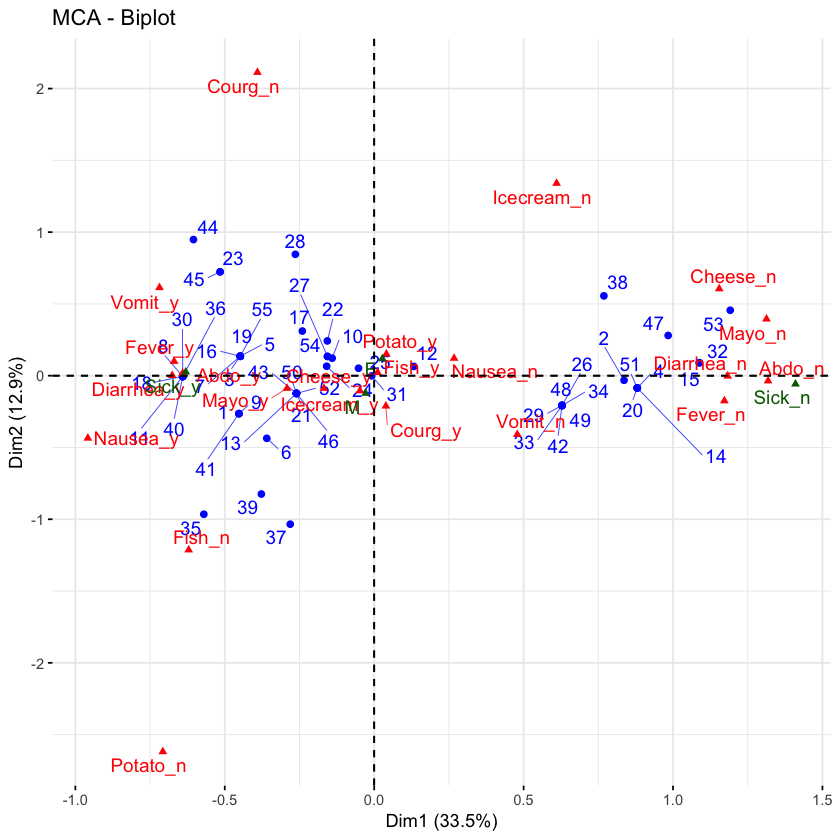

In [48]:
fviz_mca_biplot(res.mca, repel = TRUE,
                ggtheme = theme_minimal())

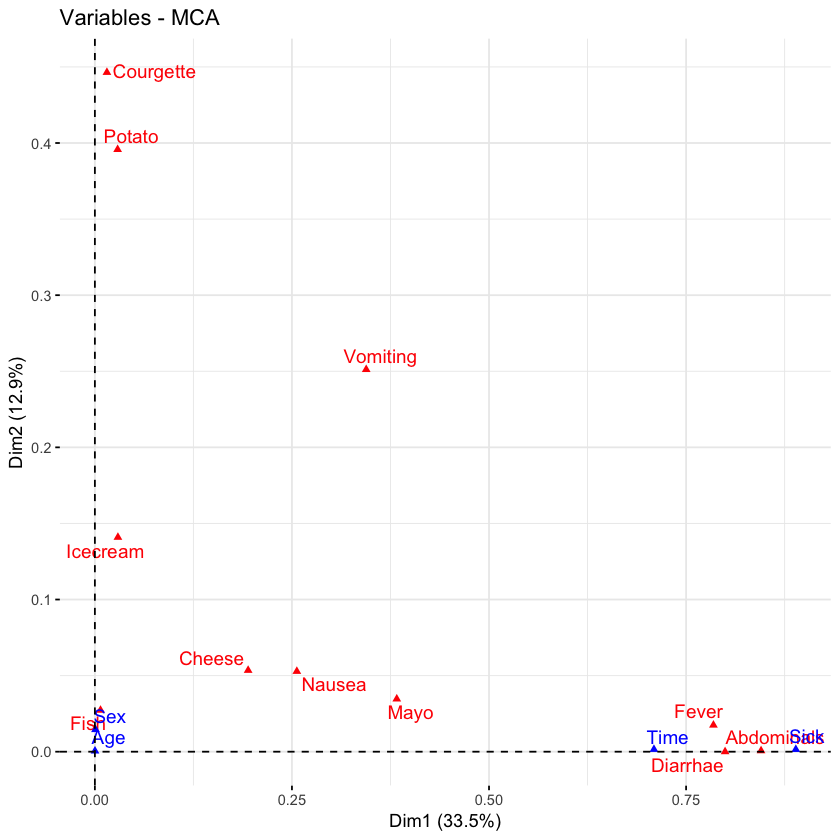

In [49]:
fviz_mca_var(res.mca, choice = "mca.cor",
             repel = TRUE)